In [1]:
# Install (if needed) and import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [4]:
# Load dataset into a DataFrame
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

# Preview first few rows
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# Dataset shape and basic info
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# Check data types
df.info()

# Check for missing values
df.isnull().sum()


Shape of dataset: (15509, 10)

Columns: ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [8]:
# Select correct columns based on the dataset
selected_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']
df = df[selected_columns]

# Drop rows with missing ratings
df = df.dropna(subset=['Rating'])

# Preview the selected data
df.head()


,Genre,Director,Actor 1,Actor 2,Actor 3,Rating
1,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0
3,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.4
5,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.7
6,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.4
8,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6


In [9]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 'Unknown'
df.fillna('Unknown', inplace=True)

# Categorical columns to encode
cat_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Initialize label encoder
le = LabelEncoder()

# Encode each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

# Preview the encoded dataframe
df.head()


,Genre,Director,Actor 1,Actor 2,Actor 3,Rating
1,268,811,1782,2815,377,7.0
3,207,1749,1589,890,2572,4.4
5,177,2005,508,85,2449,4.7
6,331,2643,931,1388,3030,7.4
8,367,174,2521,1461,1205,5.6


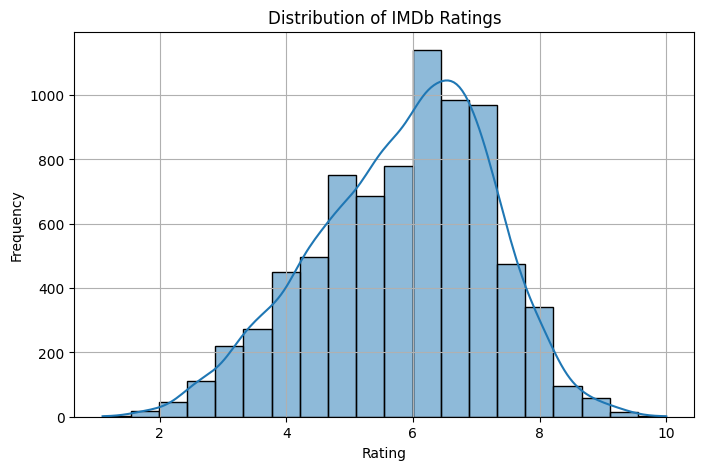

In [16]:
# IMDb ratings are spread:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


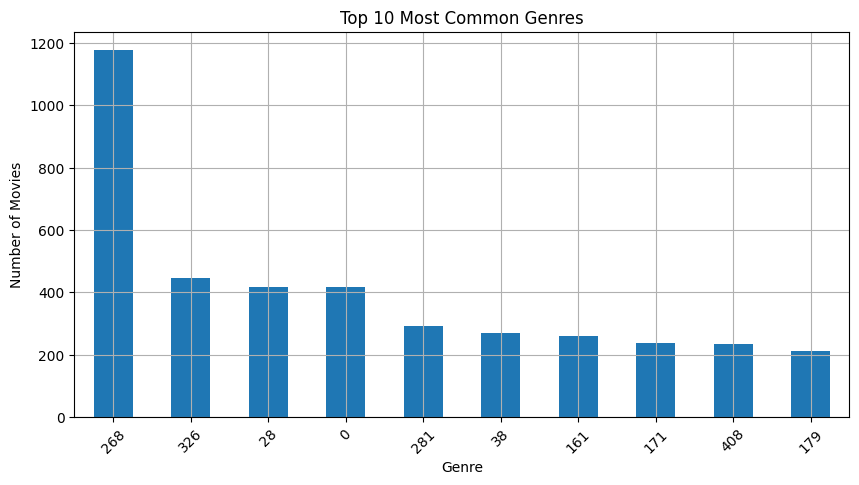

In [17]:
# Genres appear most often:
plt.figure(figsize=(10, 5))
df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


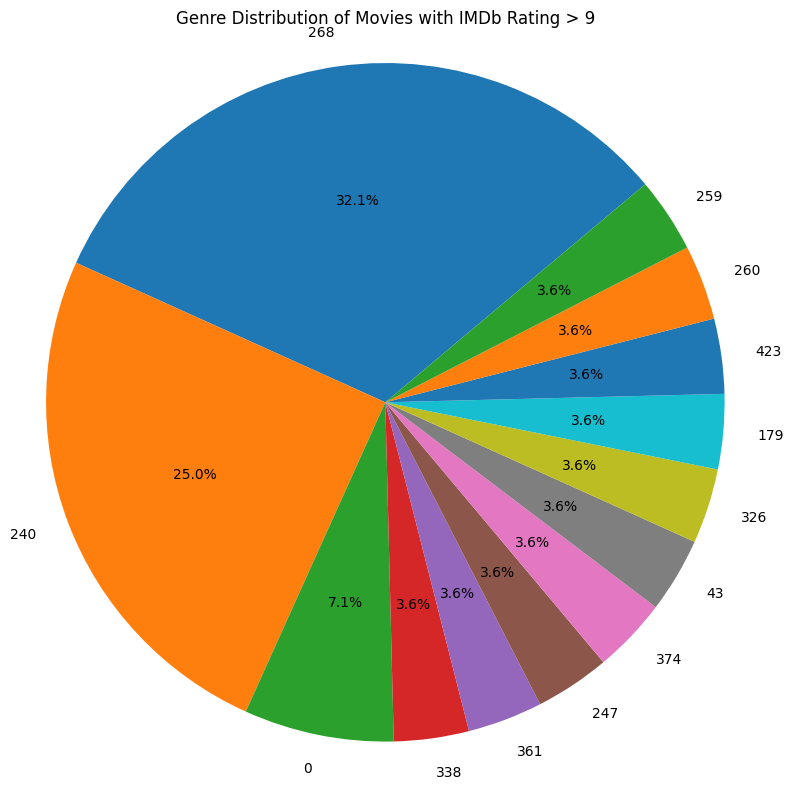

In [21]:
# Creating Pie Chart of Genres for Movies with Rating > 9
high_rating_genre = df[df['Rating'] > 9]
genre_frequency = high_rating_genre['Genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    genre_frequency,
    labels=genre_frequency.index,
    autopct='%1.1f%%',
    startangle=40
)
plt.title("Genre Distribution of Movies with IMDb Rating > 9")
plt.axis("equal")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (6335, 5)
Test set size: (1584, 5)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 1.28
R² Score: 0.11


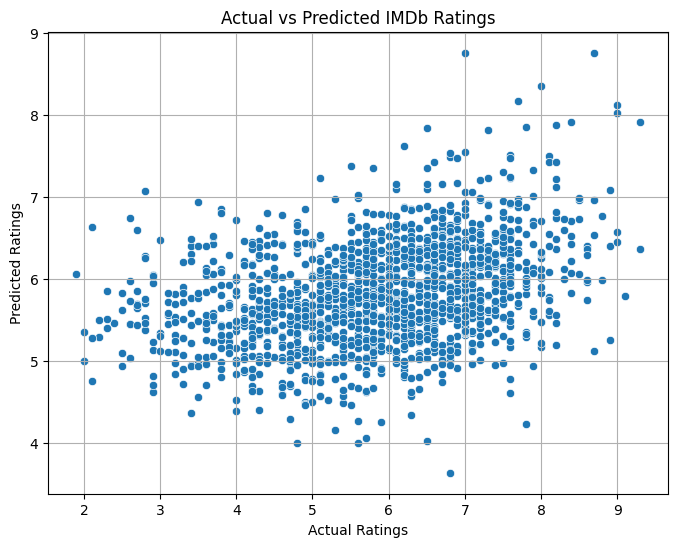

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred)

# Add labels and title
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted IMDb Ratings")
plt.grid(True)

# Show plot
plt.show()


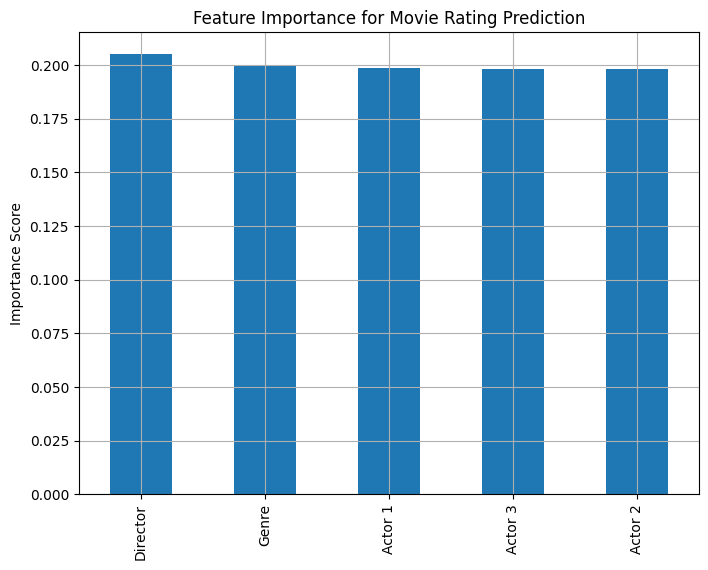

In [14]:
# Feature importance from the trained model
importances = model.feature_importances_

# Create a Pandas Series and plot
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance for Movie Rating Prediction")
plt.ylabel("Importance Score")
plt.grid(True)
plt.show()
